In [1]:
import pandas as pd

Lendo o dataset

In [2]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

# check which datasets can be imported
list_available_datasets()

# import dataset
heart_disease = fetch_ucirepo(id=45)
# alternatively: fetch_ucirepo(name='Heart Disease')

# access data
X = heart_disease.data.features
y = heart_disease.data.targets
# train model e.g. sklearn.linear_model.LinearRegression().fit(X, y)

# access metadata
print(heart_disease.metadata.uci_id)
print(heart_disease.metadata.num_instances)
print(heart_disease.metadata.additional_info.summary)

# access variable info in tabular format
print(heart_disease.variables)

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
real_estate_valuation = fetch_ucirepo(id=477) 
  
# data (as pandas dataframes) 
X = real_estate_valuation.data.features 
y = real_estate_valuation.data.targets 
  
# metadata 
print(real_estate_valuation.metadata) 
  
# variable information 
print(real_estate_valuation.variables) 

{'uci_id': 477, 'name': 'Real Estate Valuation', 'repository_url': 'https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set', 'data_url': 'https://archive.ics.uci.edu/static/public/477/data.csv', 'abstract': 'The real estate valuation is a regression problem. The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan. ', 'area': 'Business', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 414, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Y house price of unit area'], 'index_col': ['No'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5J30W', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 373, 'type': 'NATIVE', 'title': 'Building real estate valuation models with comparative approach through case-based reasoning', 'authors': 'I. Yeh

Head do dataset

In [4]:
df = X.copy()
df["price_per_unit_area"] = y.squeeze()
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,price_per_unit_area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


Renomeando colunas

In [5]:
# renomeando colunas

df.columns = [
    "data_transacao",         
    "idade_imovel",            
    "distancia_metro",         
    "num_lojas_conveniencia", 
    "latitude",                
    "longitude",               
    "preco_m2"                 
]

df.head()


,data_transacao,idade_imovel,distancia_metro,num_lojas_conveniencia,latitude,longitude,preco_m2
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


Arrumando o ano da transação

In [6]:
import numpy as np

# ano = parte inteira
df["ano"] = df["data_transacao"].astype(int)

# mês = parte decimal * 12, arredondado
frac = df["data_transacao"] - df["ano"]
df["mes"] = (frac * 12).round().astype(int)

# se por acaso algum mês virar 0, ajusta para 1
df.loc[df["mes"] == 0, "mes"] = 1

# opcional: criar uma coluna datetime (1º dia do mês)
df["data"] = pd.to_datetime(dict(year=df["ano"], month=df["mes"], day=1))
df.drop(columns=["data_transacao", "ano", "mes"], inplace=True)
df.head()

,idade_imovel,distancia_metro,num_lojas_conveniencia,latitude,longitude,preco_m2,data
0,32.0,84.87882,10,24.98298,121.54024,37.9,2012-11-01
1,19.5,306.59470,9,24.98034,121.53951,42.2,2012-11-01
2,13.3,561.98450,5,24.98746,121.54391,47.3,2013-07-01
3,13.3,561.98450,5,24.98746,121.54391,54.8,2013-06-01
4,5.0,390.56840,5,24.97937,121.54245,43.1,2012-10-01


Identificando os tipos de cara coluna

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   idade_imovel            414 non-null    float64       
 1   distancia_metro         414 non-null    float64       
 2   num_lojas_conveniencia  414 non-null    int64         
 3   latitude                414 non-null    float64       
 4   longitude               414 non-null    float64       
 5   preco_m2                414 non-null    float64       
 6   data                    414 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 22.8 KB


Vendo se há valores ausentes

In [19]:
df.isnull().sum()

idade_imovel              0
distancia_metro           0
num_lojas_conveniencia    0
latitude                  0
longitude                 0
preco_m2                  0
data                      0
dtype: int64

Montando matriz de correlação

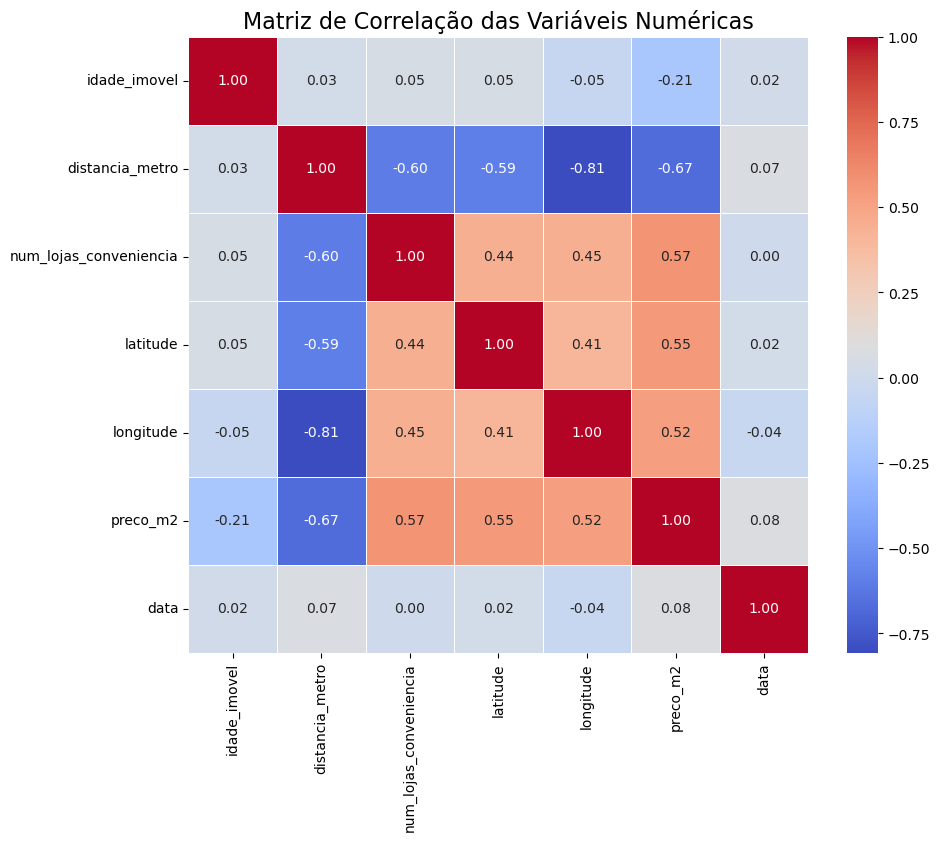

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
matriz_correlacao = df.corr()

plt.figure(figsize=(10, 8))


sns.heatmap(
    matriz_correlacao,
    annot=True,         
    cmap='coolwarm',     
    fmt=".2f",           
    linewidths=.5        
)

plt.title('Matriz de Correlação das Variáveis Numéricas', fontsize=16)

plt.show()

- quanto mais lojas maior o preço
- quanto maior a distancia para o metro menor o preço
- quanto mais velhor for o imovel menor o preço

Mostrando alguns gráficos para identificar relação entre as variaveis

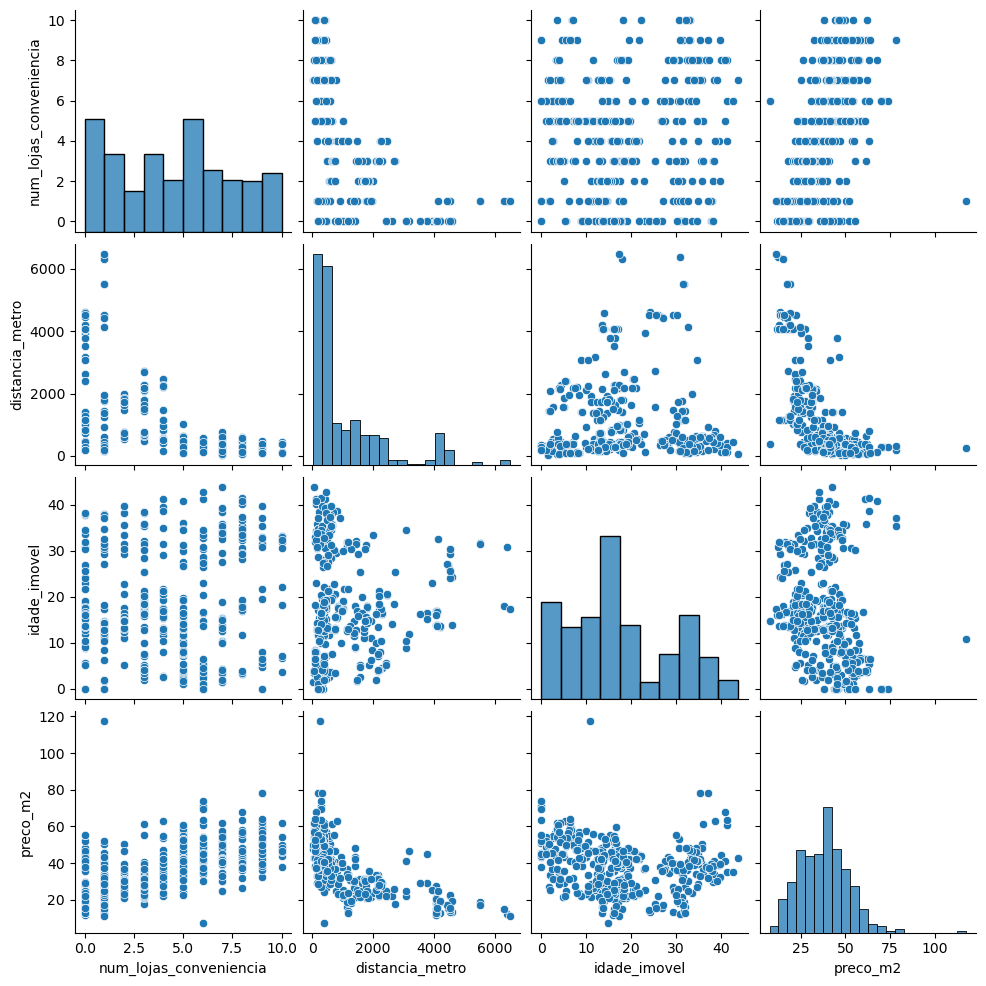

In [24]:
most_important_features = [
    "num_lojas_conveniencia",
    "distancia_metro",
    "idade_imovel",
    "preco_m2"
]
sns.pairplot(df[most_important_features])

transformando distancia_metro em logaritmo para ficar melhor a visualização

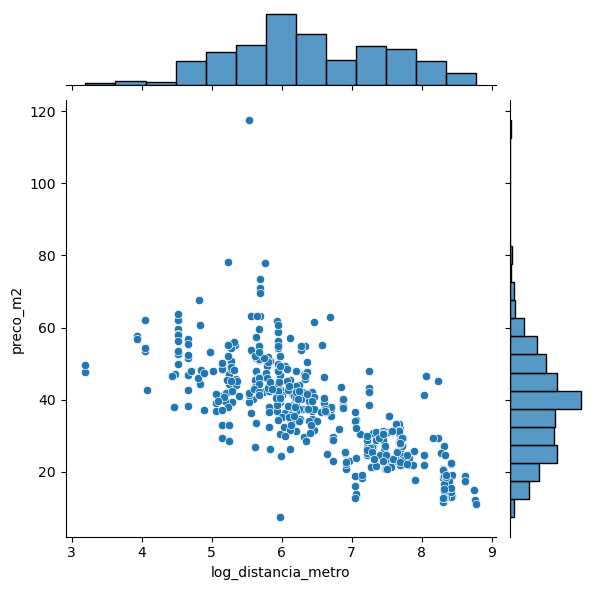

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Criar a feature transformada
df["log_distancia_metro"] = np.log1p(df["distancia_metro"])

# 2) Ver a relação com o preço
sns.jointplot(
    data=df,
    x="log_distancia_metro",
    y="preco_m2",
    kind="scatter"
)
plt.show()


criando a variavel perto_metro

<Axes: xlabel='perto_metro', ylabel='preco_m2'>

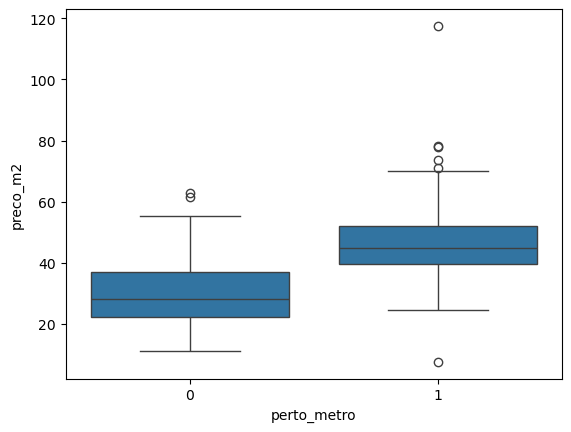

In [8]:
df["perto_metro"] = (df["distancia_metro"] < 500).astype(int)
sns.boxplot(
    data=df,
    x="perto_metro",
    y="preco_m2"
)

- Estar perto do metrô praticamente dobra o valor típico do imóvel.
reforçando a importância da acessibilidade ao transporte público na valoração imobiliária.

criando a faixa de idade do imovel para ver se há relação

In [9]:
df["faixa_idade"] = pd.cut(
    df["idade_imovel"],
    bins=[0, 10, 30, df["idade_imovel"].max()],
    labels=["novo", "medio", "antigo"]
)

df["faixa_idade"].value_counts()


faixa_idade
medio     210
antigo     94
novo       93
Name: count, dtype: int64

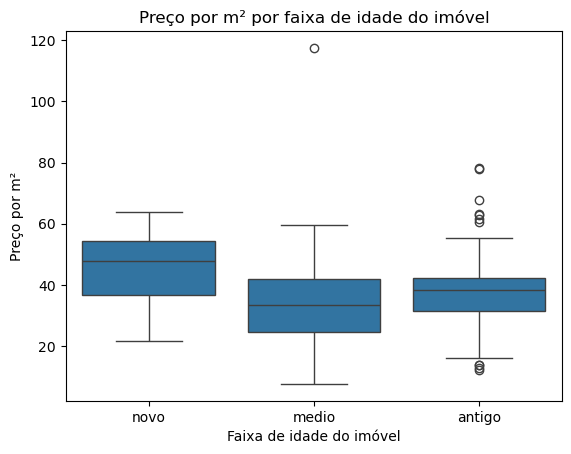

In [10]:
sns.boxplot(data=df, x="faixa_idade", y="preco_m2", order=["novo","medio","antigo"])
plt.xlabel("Faixa de idade do imóvel")
plt.ylabel("Preço por m²")
plt.title("Preço por m² por faixa de idade do imóvel")
plt.show()


- imoveis novos tendem a ser mais caros
- imoveis antigos tem uma mediana maior que a dos imoveis medios possivelmente por conta da localização dos imoveis antigos serem privilegiadas.
- imoveis medios, entre 10 - 30 anos, tem maior variabilidade de preço.

In [11]:
df.head()

,idade_imovel,distancia_metro,num_lojas_conveniencia,latitude,longitude,preco_m2,data,log_distancia_metro,perto_metro,faixa_idade
0,32.0,84.87882,10,24.98298,121.54024,37.9,2012-11-01,4.452937,1,antigo
1,19.5,306.59470,9,24.98034,121.53951,42.2,2012-11-01,5.728783,1,medio
2,13.3,561.98450,5,24.98746,121.54391,47.3,2013-07-01,6.333252,0,medio
3,13.3,561.98450,5,24.98746,121.54391,54.8,2013-06-01,6.333252,0,medio
4,5.0,390.56840,5,24.97937,121.54245,43.1,2012-10-01,5.970160,1,novo


transformando faixa_idade em 2 novas colunas
- faixa_idade_medio
- faixa_idade_antigo
- caso seja False em ambos o imovel é considerado novo

In [12]:
df = pd.get_dummies(df, columns=["faixa_idade"], drop_first=True)

df.head()


,idade_imovel,distancia_metro,num_lojas_conveniencia,latitude,longitude,preco_m2,data,log_distancia_metro,perto_metro,faixa_idade_medio,faixa_idade_antigo
0,32.0,84.87882,10,24.98298,121.54024,37.9,2012-11-01,4.452937,1,False,True
1,19.5,306.59470,9,24.98034,121.53951,42.2,2012-11-01,5.728783,1,True,False
2,13.3,561.98450,5,24.98746,121.54391,47.3,2013-07-01,6.333252,0,True,False
3,13.3,561.98450,5,24.98746,121.54391,54.8,2013-06-01,6.333252,0,True,False
4,5.0,390.56840,5,24.97937,121.54245,43.1,2012-10-01,5.970160,1,False,False


criando ano e mes para ver se há relação de valorização e sazonalidade

In [13]:
df["ano"] = df["data"].dt.year
df["mes"] = df["data"].dt.month

Text(0, 0.5, 'Preço por m²')

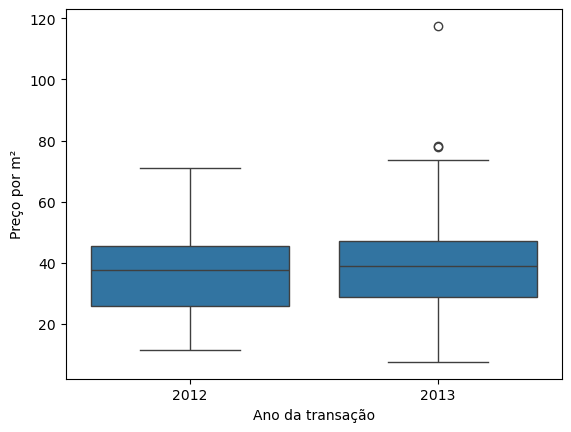

In [33]:
sns.boxplot(data=df, x="ano", y="preco_m2")
plt.xlabel("Ano da transação")
plt.ylabel("Preço por m²")

- Como podemos ver os imoveis valorizaram de um ano para o outro

Text(0.5, 0, 'Mês da transação')

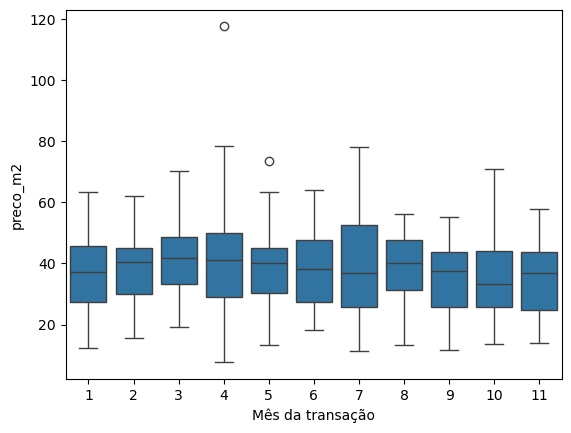

In [35]:
sns.boxplot(data=df, x="mes", y="preco_m2")
plt.xlabel("Mês da transação")

- Não consegui identificar sazonalidade nesse grafico

In [36]:
df.head()

,idade_imovel,distancia_metro,num_lojas_conveniencia,latitude,longitude,preco_m2,data,log_distancia_metro,perto_metro,faixa_idade_medio,faixa_idade_antigo,ano,mes
0,32.0,84.87882,10,24.98298,121.54024,37.9,2012-11-01,4.452937,1,False,True,2012,11
1,19.5,306.59470,9,24.98034,121.53951,42.2,2012-11-01,5.728783,1,True,False,2012,11
2,13.3,561.98450,5,24.98746,121.54391,47.3,2013-07-01,6.333252,0,True,False,2013,7
3,13.3,561.98450,5,24.98746,121.54391,54.8,2013-06-01,6.333252,0,True,False,2013,6
4,5.0,390.56840,5,24.97937,121.54245,43.1,2012-10-01,5.970160,1,False,False,2012,10


In [15]:
df.to_parquet("real_estate_preprocessed.parquet", index=False)

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import numpy as np


y = df["preco_m2"]
features = [
    "idade_imovel",
    "log_distancia_metro",
    "num_lojas_conveniencia",
    "perto_metro",
    "latitude",
    "longitude",
    "ano",
    "mes",
    "faixa_idade_medio",
    "faixa_idade_antigo",
]
X = df[features]

X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, y, test_size=0.2, random_state=42
)

def avalia_reg(nome, modelo):
    modelo.fit(X_treino, y_treino)
    y_pred = modelo.predict(X_teste)

    mae = mean_absolute_error(y_teste, y_pred)
    rmse = np.sqrt(mean_squared_error(y_teste, y_pred))
    r2 = r2_score(y_teste, y_pred)

    print(f"\n=== {nome} ===")
    print(f"MAE : {mae:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R²  : {r2:.3f}")

# Modelos de regressão
reg_linear = LinearRegression()
rf_reg = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)
xgb_reg = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

avalia_reg("Regressão Linear", reg_linear)
avalia_reg("Random Forest Regressor", rf_reg)
avalia_reg("XGBoost Regressor", xgb_reg)



=== Regressão Linear ===
MAE : 4.543
RMSE: 6.713
R²  : 0.731

=== Random Forest Regressor ===
MAE : 3.988
RMSE: 5.605
R²  : 0.813

=== XGBoost Regressor ===
MAE : 4.107
RMSE: 5.907
R²  : 0.792


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
import numpy as np

y = df["preco_m2"]
features = [
    "idade_imovel",
    "log_distancia_metro",
    "num_lojas_conveniencia",
    "perto_metro",
    "latitude",
    "longitude",
    "ano",
    "mes",
    "faixa_idade_medio",
    "faixa_idade_antigo",
]
X = df[features]

X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, y, test_size=0.2, random_state=42
)

def avalia_reg(nome, modelo):
    modelo.fit(X_treino, y_treino)
    y_pred = modelo.predict(X_teste)

    mae = mean_absolute_error(y_teste, y_pred)
    rmse = np.sqrt(mean_squared_error(y_teste, y_pred))
    r2 = r2_score(y_teste, y_pred)

    print(f"\n=== {nome} ===")
    print(f"MAE : {mae:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R²  : {r2:.3f}")

# Regressão Linear (COM normalização)
reg_linear = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])


rf_reg = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)


xgb_reg = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

# Executar avaliações
avalia_reg("Regressão Linear (Normalizada)", reg_linear)
avalia_reg("Random Forest Regressor", rf_reg)
avalia_reg("XGBoost Regressor", xgb_reg)



=== Regressão Linear (Normalizada) ===
MAE : 4.543
RMSE: 6.713
R²  : 0.731

=== Random Forest Regressor ===
MAE : 3.988
RMSE: 5.605
R²  : 0.813

=== XGBoost Regressor ===
MAE : 4.107
RMSE: 5.907
R²  : 0.792


log_distancia_metro       0.567717
idade_imovel              0.178343
latitude                  0.120374
longitude                 0.072437
mes                       0.025863
num_lojas_conveniencia    0.024327
ano                       0.005733
faixa_idade_medio         0.003269
faixa_idade_antigo        0.001502
perto_metro               0.000435
dtype: float64


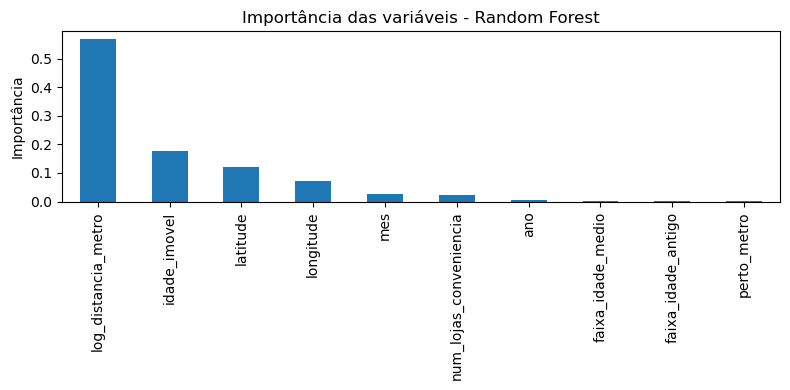

In [22]:
importancias = rf_reg.feature_importances_
feat_importances = pd.Series(importancias, index=X.columns).sort_values(ascending=False)

print(feat_importances)

plt.figure(figsize=(8,4))
feat_importances.plot(kind="bar")
plt.ylabel("Importância")
plt.title("Importância das variáveis - Random Forest")
plt.tight_layout()
plt.show()


In [23]:
# exemplo de imóvel (modifique os valores como quiser)
novo_imovel = {
    "idade_imovel": 5,
    "log_distancia_metro": np.log1p(300),
    "num_lojas_conveniencia": 8,
    "perto_metro": 1,      
    "latitude": 24.98,
    "longitude": 121.54,
    "ano": 2013,
    "mes": 6,
    "faixa_idade_medio": 0,   
    "faixa_idade_antigo": 0,  
}

X_novo = pd.DataFrame([novo_imovel])

previsao_preco = rf_reg.predict(X_novo)[0]
print(f"Preço previsto: {previsao_preco:.2f}")


Preço previsto: 52.58


# Classificação

#### Definimos imóveis de alto preço como aqueles com valor por m² acima da mediana da base. Essa escolha garante classes balanceadas (50/50) e facilita a avaliação dos modelos de classificação.

In [31]:
import numpy as np

# corte pela mediana do preço
limiar = df["preco_m2"].median()
print("Limiar de alto_preco (mediana):", limiar)

df["alto_preco"] = (df["preco_m2"] >= limiar).astype(int)
df["alto_preco"].value_counts()

Limiar de alto_preco (mediana): 38.45


alto_preco
0    207
1    207
Name: count, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

features = [
    "idade_imovel",
    "log_distancia_metro",
    "num_lojas_conveniencia",
    "perto_metro",
    "latitude",
    "longitude",
    "ano",
    "mes",
    "faixa_idade_medio",
    "faixa_idade_antigo",
]

X_cls = df[features]
y_cls = df["alto_preco"]

Xc_treino, Xc_teste, yc_treino, yc_teste = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)


In [33]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)

def avalia_cls(nome, modelo):
    modelo.fit(Xc_treino, yc_treino)
    y_pred = modelo.predict(Xc_teste)

    acc = accuracy_score(yc_teste, y_pred)
    prec = precision_score(yc_teste, y_pred)
    rec = recall_score(yc_teste, y_pred)
    f1 = f1_score(yc_teste, y_pred)

    print(f"\n=== {nome} ===")
    print(f"Accuracy : {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall   : {rec:.3f}")
    print(f"F1-score : {f1:.3f}")
    print("Matriz de confusão:")
    print(confusion_matrix(yc_teste, y_pred))


In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Logistic Regression com normalização
log_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000))
])

# XGBoost Classifier (árvore, não precisa normalizar)
xgb_cls = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

avalia_cls("Logistic Regression", log_reg)
avalia_cls("XGBoost Classifier", xgb_cls)



=== Logistic Regression ===
Accuracy : 0.795
Precision: 0.761
Recall   : 0.854
F1-score : 0.805
Matriz de confusão:
[[31 11]
 [ 6 35]]

=== XGBoost Classifier ===
Accuracy : 0.819
Precision: 0.795
Recall   : 0.854
F1-score : 0.824
Matriz de confusão:
[[33  9]
 [ 6 35]]


#### Usando quartil 75 para deixar os top 25% mais caros ( mais realista )

In [26]:
limiar = df["preco_m2"].quantile(0.75)
df["alto_preco"] = (df["preco_m2"] >= limiar).astype(int)
df["alto_preco"].value_counts()
print(limiar)

46.6


In [27]:
from sklearn.model_selection import train_test_split

features = [
    "idade_imovel",
    "log_distancia_metro",
    "num_lojas_conveniencia",
    "perto_metro",
    "latitude",
    "longitude",
    "ano",
    "mes",
    "faixa_idade_medio",
    "faixa_idade_antigo",
]

X_cls = df[features]
y_cls = df["alto_preco"]

Xc_treino, Xc_teste, yc_treino, yc_teste = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)


In [28]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)

def avalia_cls(nome, modelo):
    modelo.fit(Xc_treino, yc_treino)
    y_pred = modelo.predict(Xc_teste)

    acc = accuracy_score(yc_teste, y_pred)
    prec = precision_score(yc_teste, y_pred)
    rec = recall_score(yc_teste, y_pred)
    f1 = f1_score(yc_teste, y_pred)

    print(f"\n=== {nome} ===")
    print(f"Accuracy : {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall   : {rec:.3f}")
    print(f"F1-score : {f1:.3f}")
    print("Matriz de confusão:")
    print(confusion_matrix(yc_teste, y_pred))


In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Logistic Regression com normalização
log_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000))
])

# XGBoost Classifier (árvore, não precisa normalizar)
xgb_cls = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

avalia_cls("Logistic Regression", log_reg)
avalia_cls("XGBoost Classifier", xgb_cls)



=== Logistic Regression ===
Accuracy : 0.904
Precision: 0.933
Recall   : 0.667
F1-score : 0.778
Matriz de confusão:
[[61  1]
 [ 7 14]]

=== XGBoost Classifier ===
Accuracy : 0.855
Precision: 0.846
Recall   : 0.524
F1-score : 0.647
Matriz de confusão:
[[60  2]
 [10 11]]


Usaremos o Logistic Regression para classificação e Random Forest para regressão 
- Classificação estamos classificando em imoveis de alto valor.
- Regressão estamos predizendo o preço do imovel